In [ ]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.multiclass import OutputCodeClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
data = arff.loadarff('CEE_DATA.arff')
df = pd.DataFrame(data[0])

In [ ]:
df

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,b'Excellent',b'male',b'General',b'NO',b'ONE',b'SEBA',b'AHSEC',b'ENGLISH',b'Excellent',b'Excellent',b'DOCTOR',b'OTHERS'
1,b'Excellent',b'male',b'OBC',b'WA',b'TWO',b'SEBA',b'AHSEC',b'OTHERS',b'Excellent',b'Excellent',b'SCHOOL_TEACHER',b'HOUSE_WIFE'
2,b'Excellent',b'male',b'OBC',b'OA',b'TWO',b'OTHERS',b'CBSE',b'ENGLISH',b'Excellent',b'Excellent',b'BUSINESS',b'HOUSE_WIFE'
3,b'Excellent',b'male',b'General',b'WA',b'ONE',b'SEBA',b'AHSEC',b'OTHERS',b'Excellent',b'Excellent',b'SCHOOL_TEACHER',b'SCHOOL_TEACHER'
4,b'Excellent',b'male',b'General',b'OA',b'TWO',b'SEBA',b'CBSE',b'ENGLISH',b'Excellent',b'Excellent',b'COLLEGE_TEACHER',b'HOUSE_WIFE'
...,...,...,...,...,...,...,...,...,...,...,...,...
661,b'Average',b'female',b'ST',b'WA',b'ONE',b'SEBA',b'AHSEC',b'ENGLISH',b'Good',b'Vg',b'OTHERS',b'HOUSE_WIFE'
662,b'Average',b'male',b'ST',b'WA',b'THREE',b'SEBA',b'AHSEC',b'ENGLISH',b'Vg',b'Good',b'CULTIVATOR',b'HOUSE_WIFE'
663,b'Average',b'male',b'ST',b'WA',b'TWO',b'SEBA',b'CBSE',b'ENGLISH',b'Good',b'Vg',b'OTHERS',b'SCHOOL_TEACHER'
664,b'Average',b'male',b'ST',b'WA',b'THREE',b'SEBA',b'AHSEC',b'ENGLISH',b'Good',b'Good',b'SCHOOL_TEACHER',b'HOUSE_WIFE'


In [ ]:
df.columns

Index(['Performance', 'Gender', 'Caste', 'coaching', 'time',
       'Class_ten_education', 'twelve_education', 'medium',
       'Class_ X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation'],
      dtype='object')

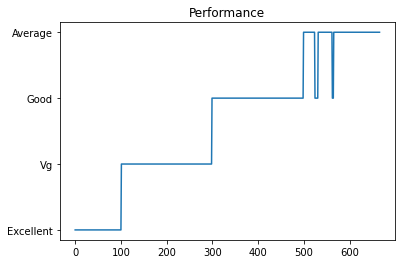

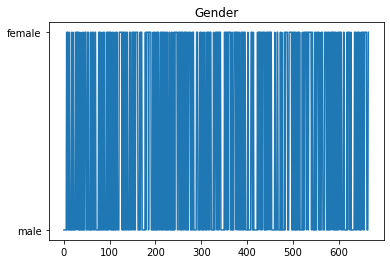

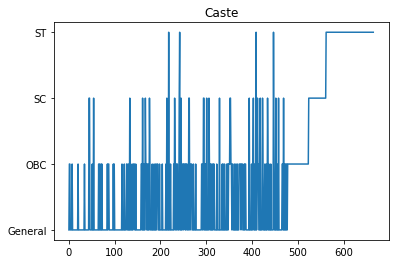

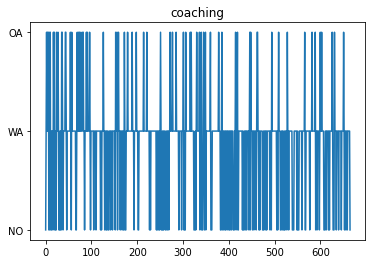

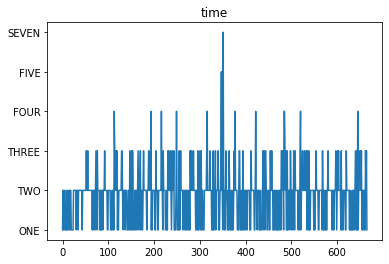

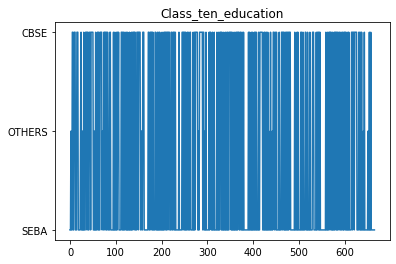

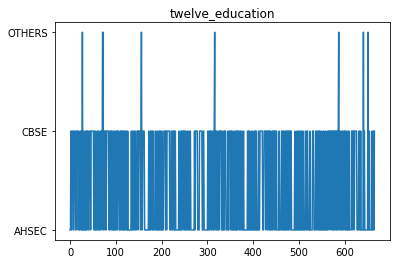

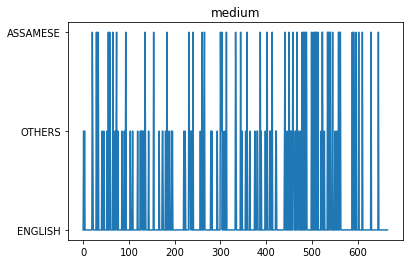

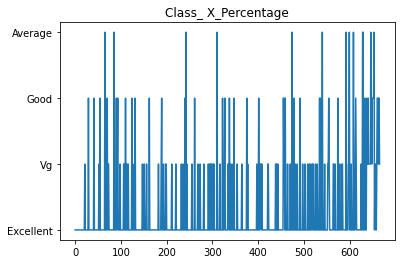

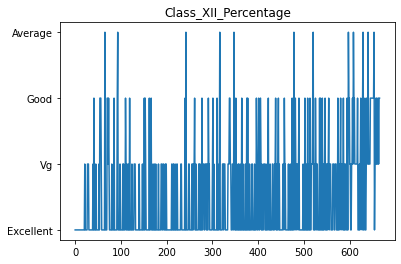

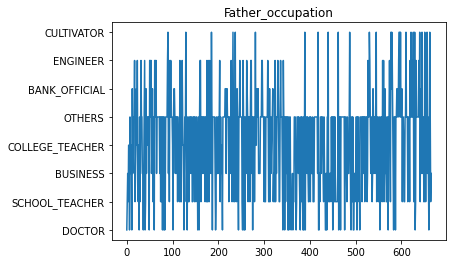

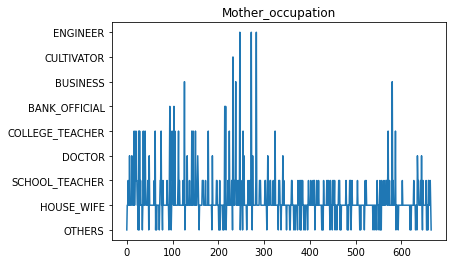

In [ ]:
for i in df.columns:
  plt.plot(df[i])
  plt.title(i)
  plt.show()

In [ ]:
df.isnull()

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
661,False,False,False,False,False,False,False,False,False,False,False,False
662,False,False,False,False,False,False,False,False,False,False,False,False
663,False,False,False,False,False,False,False,False,False,False,False,False
664,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

Performance             0
Gender                  0
Caste                   0
coaching                0
time                    0
Class_ten_education     0
twelve_education        0
medium                  0
Class_ X_Percentage     0
Class_XII_Percentage    0
Father_occupation       0
Mother_occupation       0
dtype: int64

In [ ]:
df.columns

Index(['Performance', 'Gender', 'Caste', 'coaching', 'time',
       'Class_ten_education', 'twelve_education', 'medium',
       'Class_ X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation'],
      dtype='object')

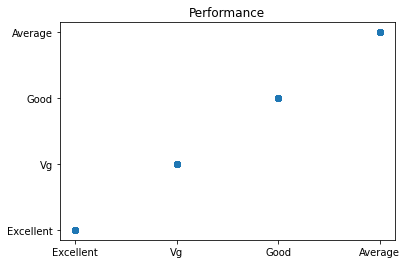

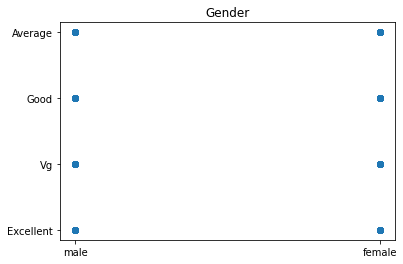

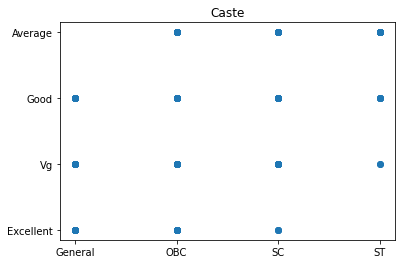

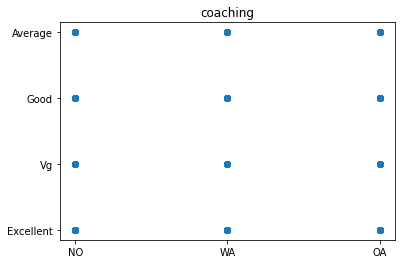

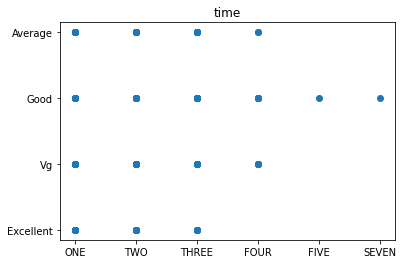

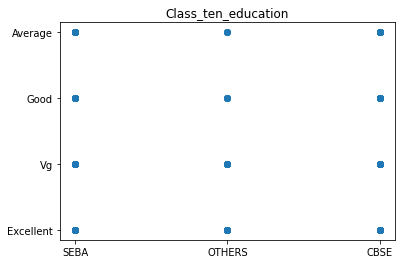

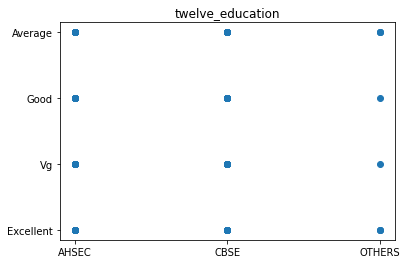

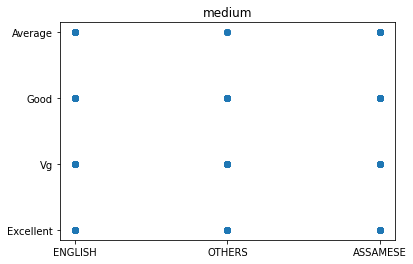

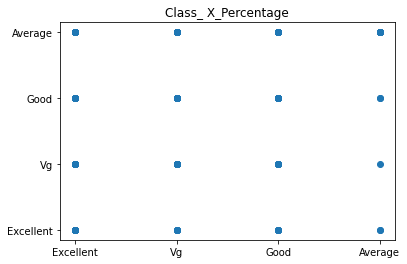

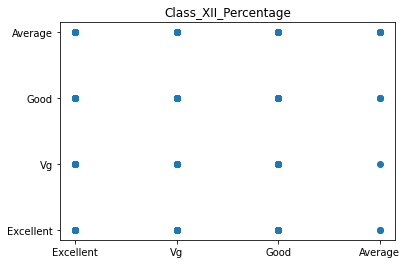

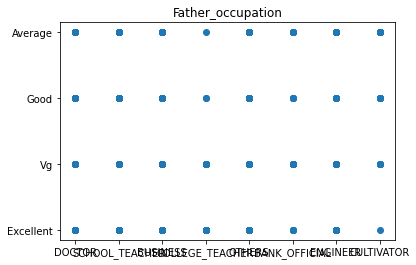

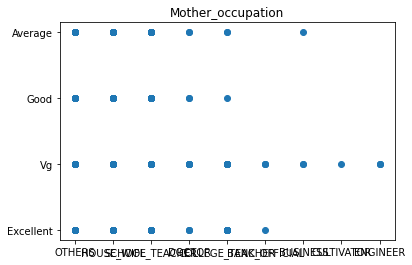

In [ ]:
for i in df.columns:
  plt.scatter(df[i].values,df['Performance'].values)
  plt.title(i)
  plt.show()


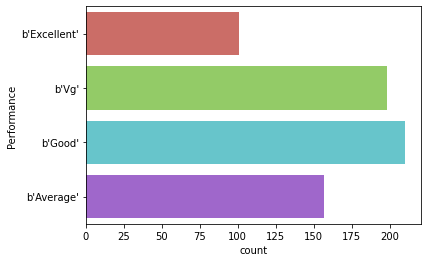

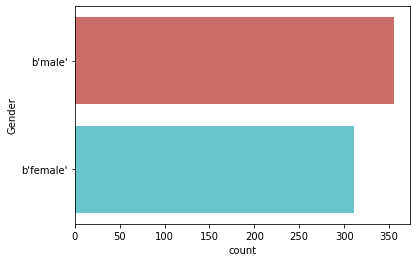

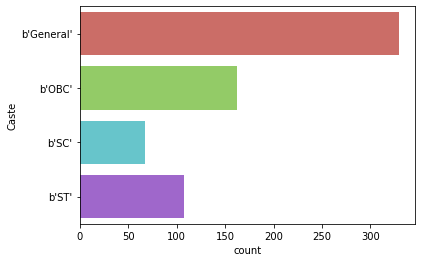

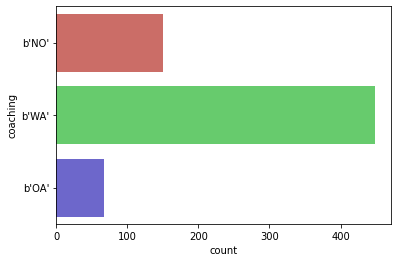

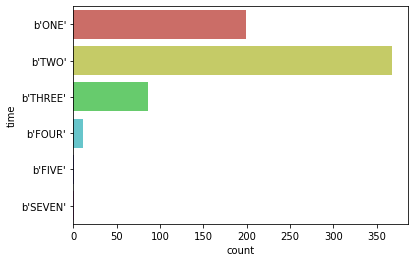

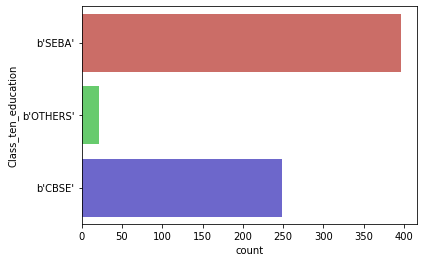

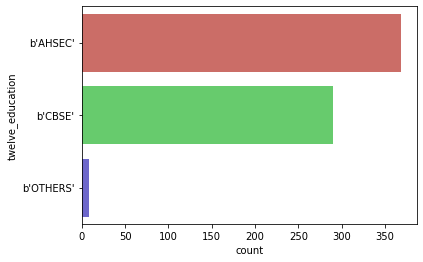

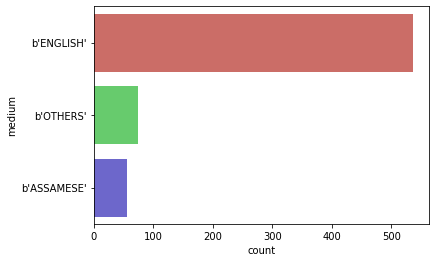

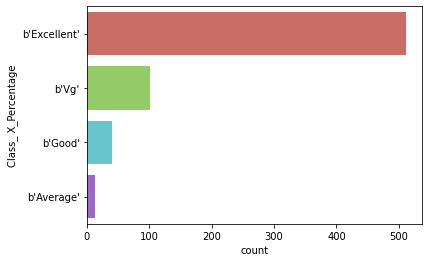

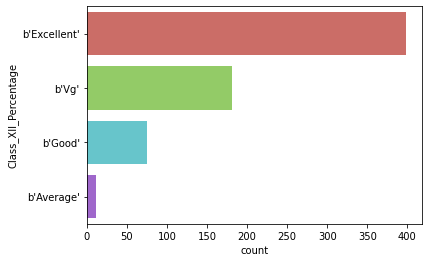

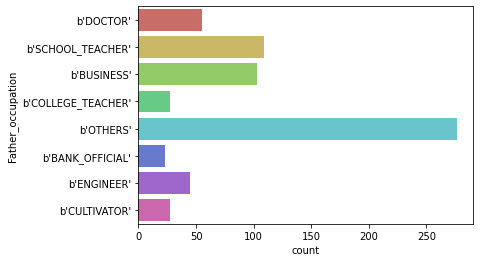

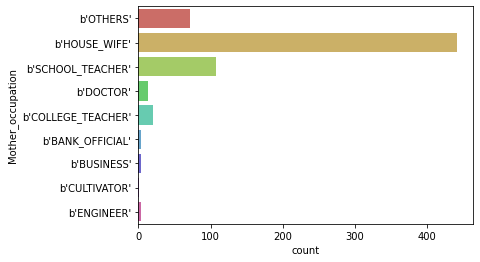

In [ ]:
for i in df.columns:
  sns.countplot(y=df[i],data=df, palette='hls')
  plt.show()

In [ ]:

data2 = pd.get_dummies(df, columns =['Gender', 'Caste', 'coaching', 'time',
       'Class_ten_education', 'twelve_education', 'medium',
       'Class_ X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation'])
#data2 = pd.get_dummies(df, columns =df.columns)
data2

,Performance,Gender_b'female',Gender_b'male',Caste_b'General',Caste_b'OBC',Caste_b'SC',Caste_b'ST',coaching_b'NO',coaching_b'OA',coaching_b'WA',time_b'FIVE',time_b'FOUR',time_b'ONE',time_b'SEVEN',time_b'THREE',time_b'TWO',Class_ten_education_b'CBSE',Class_ten_education_b'OTHERS',Class_ten_education_b'SEBA',twelve_education_b'AHSEC',twelve_education_b'CBSE',twelve_education_b'OTHERS',medium_b'ASSAMESE',medium_b'ENGLISH',medium_b'OTHERS',Class_ X_Percentage_b'Average',Class_ X_Percentage_b'Excellent',Class_ X_Percentage_b'Good',Class_ X_Percentage_b'Vg',Class_XII_Percentage_b'Average',Class_XII_Percentage_b'Excellent',Class_XII_Percentage_b'Good',Class_XII_Percentage_b'Vg',Father_occupation_b'BANK_OFFICIAL',Father_occupation_b'BUSINESS',Father_occupation_b'COLLEGE_TEACHER',Father_occupation_b'CULTIVATOR',Father_occupation_b'DOCTOR',Father_occupation_b'ENGINEER',Father_occupation_b'OTHERS',Father_occupation_b'SCHOOL_TEACHER',Mother_occupation_b'BANK_OFFICIAL',Mother_occupation_b'BUSINESS',Mother_occupation_b'COLLEGE_TEACHER',Mother_occupation_b'CULTIVATOR',Mother_occupation_b'DOCTOR',Mother_occupation_b'ENGINEER',Mother_occupation_b'HOUSE_WIFE',Mother_occupation_b'OTHERS',Mother_occupation_b'SCHOOL_TEACHER'
0,b'Excellent',0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,b'Excellent',0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,b'Excellent',0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,b'Excellent',0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,b'Excellent',0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,b'Average',1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
662,b'Average',0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
663,b'Average',0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
664,b'Average',0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
#1:'Excellent,3:'Vg',2:'Good',0:'Average'
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data2['Performance']=lb.fit_transform(data2['Performance'])
for i in data2.iloc[:101,0]:
  if i!=1:
    print('False')
for i in data2.iloc[101:298,0]:
  if i!=3:
    print('False')
for i in data2.iloc[299:498,0]:
  if i!=2:
    print('False')
for i in data2.iloc[499:524,0]:
  if i!=0:
    print('False')

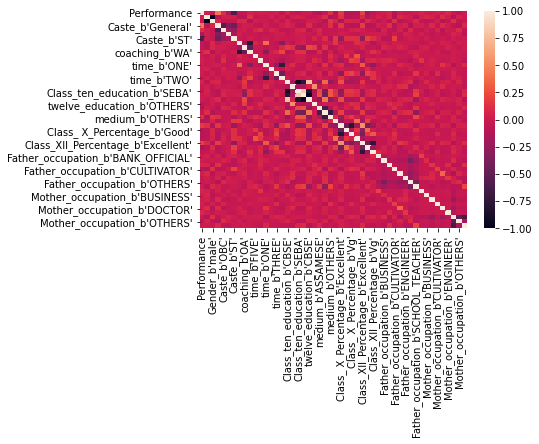

In [ ]:
sns.heatmap(data2.corr())
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(532, 49)

In [ ]:
X_test.shape

(134, 49)

In [ ]:
y_train

242    3
516    0
315    2
140    3
231    3
      ..
9      1
359    2
192    3
629    0
559    0
Name: Performance, Length: 532, dtype: int64

In [ ]:
SVC_model = SVC()
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=10)

In [ ]:
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

In [ ]:
# Accuracy score is the simplest way to evaluate
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('accuracy of SVC')
print(str(accuracy_score(SVC_prediction, y_test)))
print('accuracy of KNN ')
print(accuracy_score(KNN_prediction, y_test))
# But Confusion Matrix and Classification Report give more details about performance
print('confusion matrix of SVC ')
print(confusion_matrix(SVC_prediction, y_test))
print('confusion matrix of KNN ')
print(confusion_matrix(KNN_prediction, y_test))
print('classification_report of SVC ')
print(classification_report(SVC_prediction, y_test))
print('classification_report of KNN ')
print(classification_report(KNN_prediction, y_test))

accuracy of SVC
0.5149253731343284
accuracy of KNN 
0.4925373134328358
confusion matrix of SVC 
[[29  1  4  2]
 [ 0  3  4  1]
 [ 5  5 18 14]
 [ 0 15 14 19]]
confusion matrix of KNN 
[[28  0  8  1]
 [ 0  3  5  0]
 [ 6  5 13 13]
 [ 0 16 14 22]]
classification_report of SVC 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        36
           1       0.12      0.38      0.19         8
           2       0.45      0.43      0.44        42
           3       0.53      0.40      0.45        48

    accuracy                           0.51       134
   macro avg       0.49      0.50      0.48       134
weighted avg       0.57      0.51      0.53       134

classification_report of KNN 
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        37
           1       0.12      0.38      0.19         8
           2       0.33      0.35      0.34        37
           3       0.61      0.42      0.50  

In [ ]:
y_test

578    0
310    2
14     1
540    0
76     1
      ..
553    0
582    0
187    3
508    0
101    3
Name: Performance, Length: 134, dtype: int64

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.417910447761194
